In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Read the Excel file
file = '/Users/shubhamgupta/Desktop/Internship/Data-&-Problem-Statement---P----1/Credit.xlsx'
df_customer = pd.read_excel(file, engine='openpyxl', sheet_name='Customer Acqusition')
df_spend = pd.read_excel(file, engine='openpyxl', sheet_name='Spend')
df_repayment = pd.read_excel(file, engine='openpyxl', sheet_name='Repayment')

In [3]:
# Finding customers who are less than 18
underage_customers = df_customer[df_customer['Age'] < 18]
print(underage_customers)

print("Number of customers under 18:", len(underage_customers))  

    Sl No: Customer        Age        City Credit Card Product   Limit  \
0        1       A1   0.928521   BANGALORE                Gold  500000   
2        3       A3  11.559307      COCHIN            Platimum   10000   
9       10      A10   4.143754    CALCUTTA                Gold  500000   
11      12      A12  11.182481      BOMBAY                Gold  500000   
13      14      A14   6.772363   BANGALORE                Gold  500000   
15      16      A16   5.026450      COCHIN                Gold  500000   
18      19      A19   6.579394   BANGALORE            Platimum   10000   
28      29      A29   0.726493    CALCUTTA                Gold  500000   
29      30      A30   5.537829   BANGALORE                Gold  500000   
36      37      A37  10.683339   BANGALORE            Platimum  100003   
38      39      A39   8.054997  TRIVANDRUM            Platimum  500000   
41      42      A42  10.524981      BOMBAY                Gold  500000   
42      43      A43  12.651992   BANGA

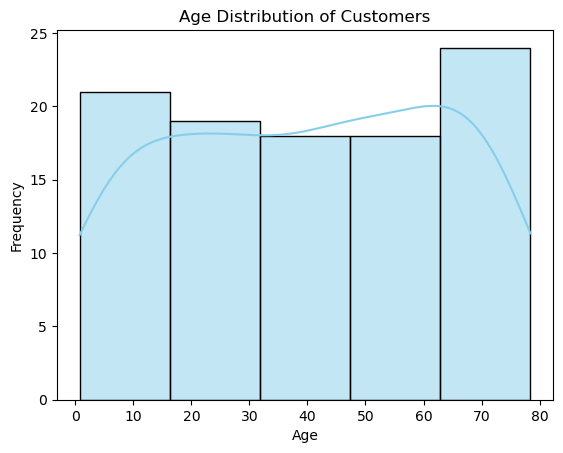

In [4]:
#Age Distribution of Customers
sns.histplot(df_customer.Age, bins=5, kde=True ,edgecolor='black', color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Mean of ages of customers who are above 18
mean_age = df_customer[df_customer['Age'] >= 18]['Age'].mean()
print(mean_age)

49.29242405876662


In [6]:
# Mean of ages of all customers after replacing underaged with mean
df_customer.loc[df_customer['Age'] < 18, 'Age'] = mean_age
print(df_customer['Age'].mean())

49.29242405876663


In [7]:
#grouped customers based on thier ages
df_customer['Age_Group'] = pd.cut(df_customer['Age'], bins=[18, 30, 45, 60, 100], labels=['Young Adult', 'Adult', 'Middle Aged', 'Senior'])

In [8]:
# rounded down ages using floor func
df_customer['Age'] = np.floor(df_customer['Age']).astype(int)
print(df_customer.head(3))

   Sl No: Customer  Age       City Credit Card Product   Limit Company  \
0       1       A1   49  BANGALORE                Gold  500000      C1   
1       2       A2   35   CALCUTTA              Silver  100000      C2   
2       3       A3   49     COCHIN            Platimum   10000      C3   

         Segment    Age_Group  
0  Self Employed  Middle Aged  
1   Salaried_MNC        Adult  
2   Salaried_Pvt  Middle Aged  


In [9]:
# Preprocess data- changed date format both spend and repayment sheets ( eg Apr 2006 )
df_spend['Month'] = pd.to_datetime(df_spend['Month'])
df_spend['Month_Year'] = df_spend['Month'].dt.strftime('%b %Y')
df_repayment['Month'] = pd.to_datetime(df_repayment['Month'])
df_repayment['Month_Year'] = df_repayment['Month'].dt.strftime('%b %Y')

In [10]:
# Ensure Amount columns in both tables are numeric
df_spend['Amount'] = pd.to_numeric(df_spend['Amount'], errors='coerce')
df_repayment['Amount'] = pd.to_numeric(df_repayment['Amount'], errors='coerce')

In [11]:
# Merge customer data with spend and repayment for limit information
df_spend_merged = df_spend.merge(df_customer[['Customer', 'Limit']], left_on='Costomer', right_on='Customer', how='left')
df_repayment_merged = df_repayment.merge(df_customer[['Customer', 'Limit']], left_on='Costomer', right_on='Customer', how='left')

In [12]:
# 1. Customers who spent more than their credit limit in any month

# Grouped by Customer and Month_Year to calculate total Amount spent
monthly_spend = df_spend.groupby(['Costomer', 'Month_Year'])['Amount'].sum().reset_index()

#merged customer aqi table with spend table using left join
monthly_spend = monthly_spend.merge(df_customer[['Customer', 'Limit']], left_on='Costomer', right_on='Customer', how='left')
over_limit = monthly_spend[monthly_spend['Amount'] > monthly_spend['Limit']]

pd.set_option('display.float_format', '{:.2f}'.format)  #used for converting values into float datatype
print("Customers who spent more than their credit limit:")
print(over_limit[['Costomer', 'Month_Year', 'Amount', 'Limit']])

Customers who spent more than their credit limit:
    Costomer Month_Year     Amount   Limit
0         A1   Apr 2006  564506.86  500000
3         A1   Feb 2005 1404193.04  500000
4         A1   Jan 2004 1511172.75  500000
12       A10   Jan 2004  747428.09  500000
17       A10   May 2005  696067.28  500000
..       ...        ...        ...     ...
796       A9   Sep 2004  324844.69  100003
803      A96   Jan 2004  320363.54  100000
804      A97   Jan 2004  164330.04   10000
805      A98   Jan 2004   87483.51   10001
806      A99   Jan 2004  476020.39   10002

[480 rows x 4 columns]


In [13]:
# 2. Monthly spend of each customer
monthly_spend_summary = df_spend.groupby(['Costomer', 'Month_Year'])['Amount'].sum().reset_index()
print("\nMonthly Spend of Each Customer:")
print(monthly_spend_summary)


Monthly Spend of Each Customer:
    Costomer Month_Year     Amount
0         A1   Apr 2006  564506.86
1         A1   Aug 2005  129388.31
2         A1   Feb 2004   41381.11
3         A1   Feb 2005 1404193.04
4         A1   Jan 2004 1511172.75
..       ...        ...        ...
802      A95   Jan 2004  347833.88
803      A96   Jan 2004  320363.54
804      A97   Jan 2004  164330.04
805      A98   Jan 2004   87483.51
806      A99   Jan 2004  476020.39

[807 rows x 3 columns]


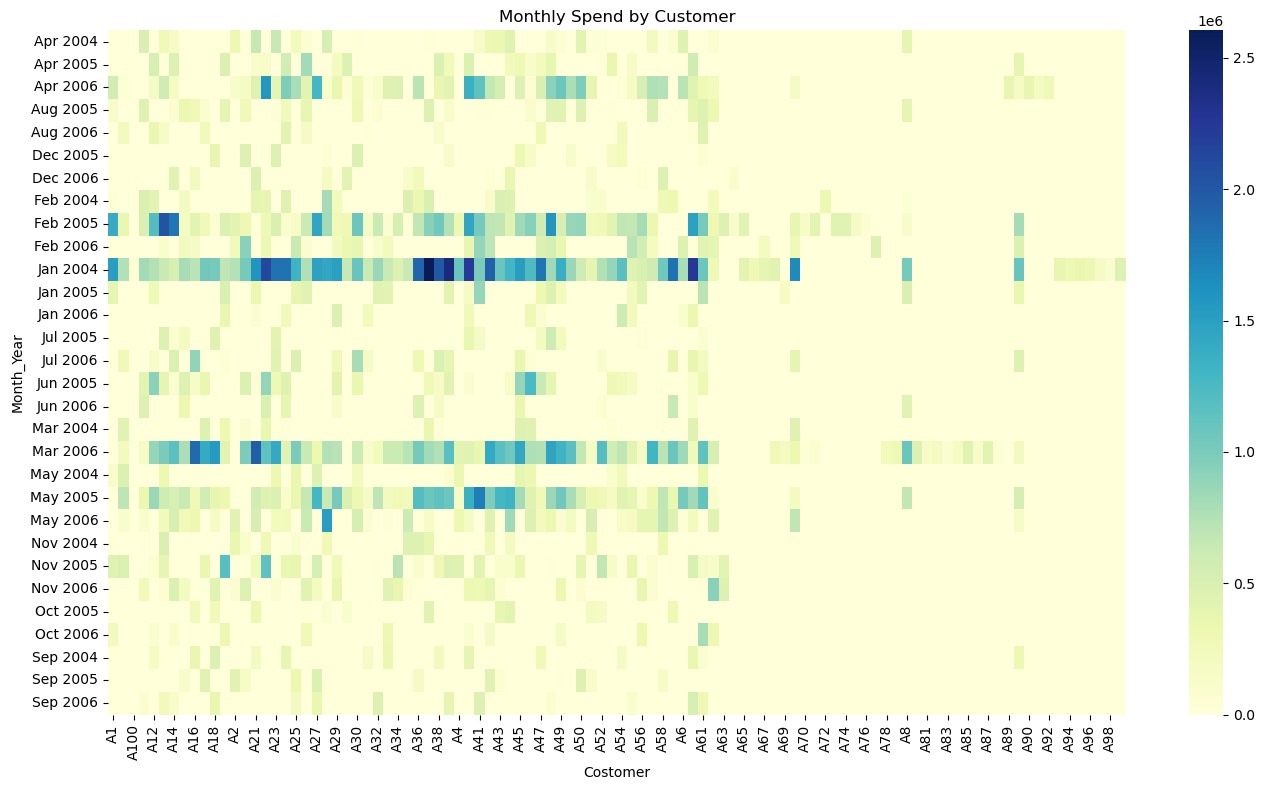

In [14]:
# Visualization for monthly spend
#used heatmap for visualization
pivot_spend = monthly_spend_summary.pivot(index='Month_Year', columns='Costomer', values='Amount').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_spend, cmap='YlGnBu', annot=False)
plt.title('Monthly Spend by Customer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# 3. Monthly repayment of each customer
monthly_repayment_summary = df_repayment.groupby(['Costomer', 'Month_Year'])['Amount'].sum().reset_index()
print("\nMonthly Repayment of Each Customer:")
print(monthly_repayment_summary)


Monthly Repayment of Each Customer:
    Costomer Month_Year     Amount
0         A1   Apr 2006  371273.27
1         A1   Feb 2004  191180.01
2         A1   Feb 2005 1199807.62
3         A1   Jan 2004 1362775.24
4         A1   Jan 2005    1581.97
..       ...        ...        ...
793      A95   Jan 2004   75109.49
794      A96   Jan 2004  110139.01
795      A97   Jan 2004  174606.39
796      A98   Jan 2004   97802.60
797      A99   Jan 2004  358589.92

[798 rows x 3 columns]


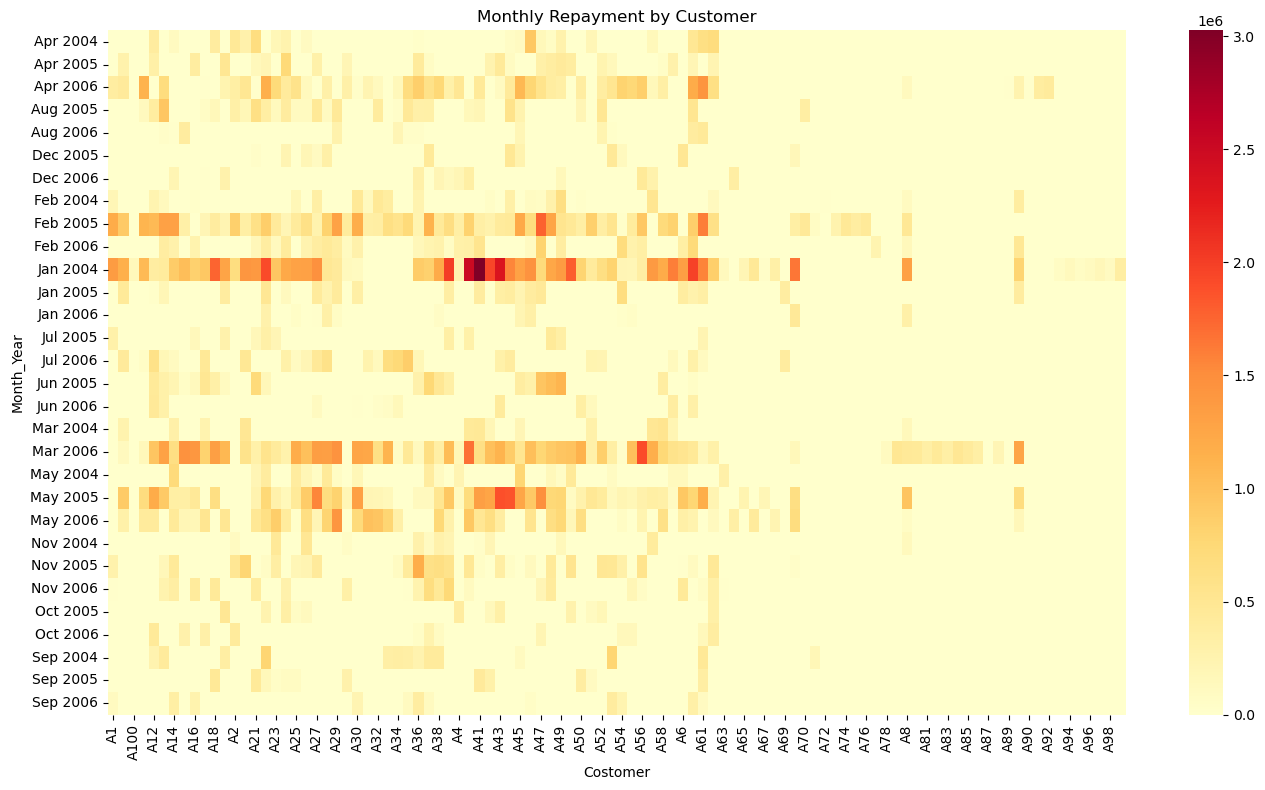

In [16]:
pivot_repayment = monthly_repayment_summary.pivot(index='Month_Year', columns='Costomer', values='Amount').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_repayment, cmap='YlOrRd', annot=False)
plt.title('Monthly Repayment by Customer')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
# 4. Highest paying 10 customers (based on total repayment)
total_repayment = df_repayment.groupby('Costomer')['Amount'].sum().reset_index()
top_10_payers = total_repayment.sort_values(by='Amount', ascending=False).head(10)
print("\nTop 10 Highest Paying Customers (Total Repayment):")
print(top_10_payers)


Top 10 Highest Paying Customers (Total Repayment):
   Costomer     Amount
15      A22 9767170.68
57      A60 9262032.37
58      A61 8807888.34
35      A40 8805084.90
42      A47 8529825.86
38      A43 8458621.33
43      A48 8432803.66
36      A41 8374045.76
44      A49 8259840.55
40      A45 8115209.87


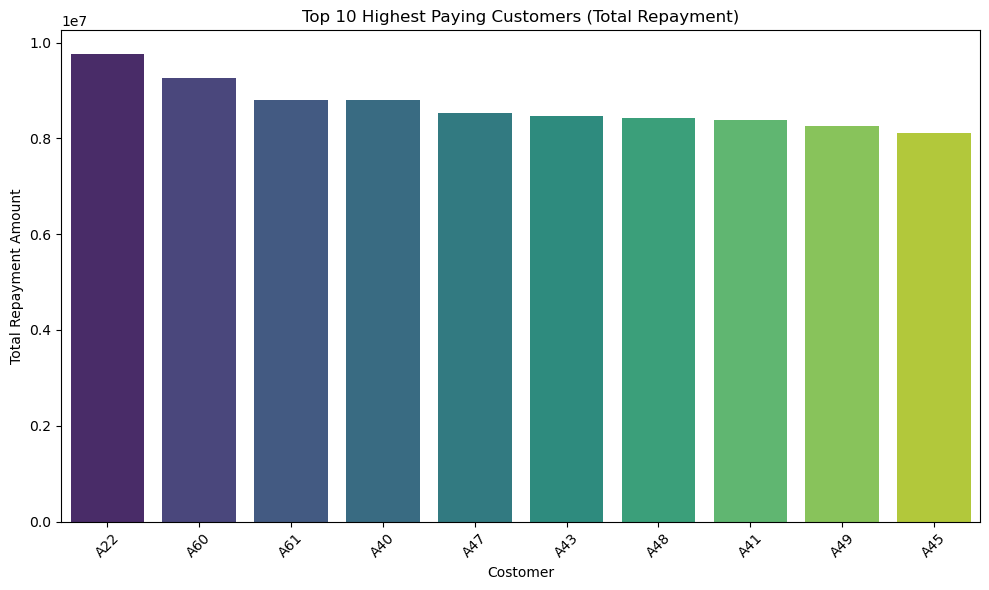

In [18]:
# Visualization for top 10 payers
#used bar chart for visualization 
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_payers, x='Costomer', y='Amount', hue='Costomer', palette='viridis', legend=False)
plt.title('Top 10 Highest Paying Customers (Total Repayment)')
plt.xticks(rotation=45)
plt.ylabel('Total Repayment Amount')
plt.tight_layout()
plt.show()

In [19]:
# 5. Segment spending analysis

# merged customer_aqi and spend tables using left outer join
segment_spend = df_spend.merge(df_customer[['Customer', 'Segment']], left_on='Costomer', right_on='Customer', how='left')
# grouped segment and month for finding spend amount
segment_spend_monthly = segment_spend.groupby(['Segment', 'Month_Year'])['Amount'].sum().reset_index()
print("\nMonthly Spend by Segment:")
print(segment_spend_monthly)


Monthly Spend by Segment:
           Segment Month_Year     Amount
0             Govt   Apr 2004  470954.32
1             Govt   Apr 2005  530130.15
2             Govt   Apr 2006 4537539.44
3             Govt   Aug 2005 1514304.98
4             Govt   Aug 2006  447836.83
..             ...        ...        ...
140  Self Employed   Oct 2005  368227.23
141  Self Employed   Oct 2006  307608.27
142  Self Employed   Sep 2004  421844.65
143  Self Employed   Sep 2005  988658.06
144  Self Employed   Sep 2006  910602.48

[145 rows x 3 columns]


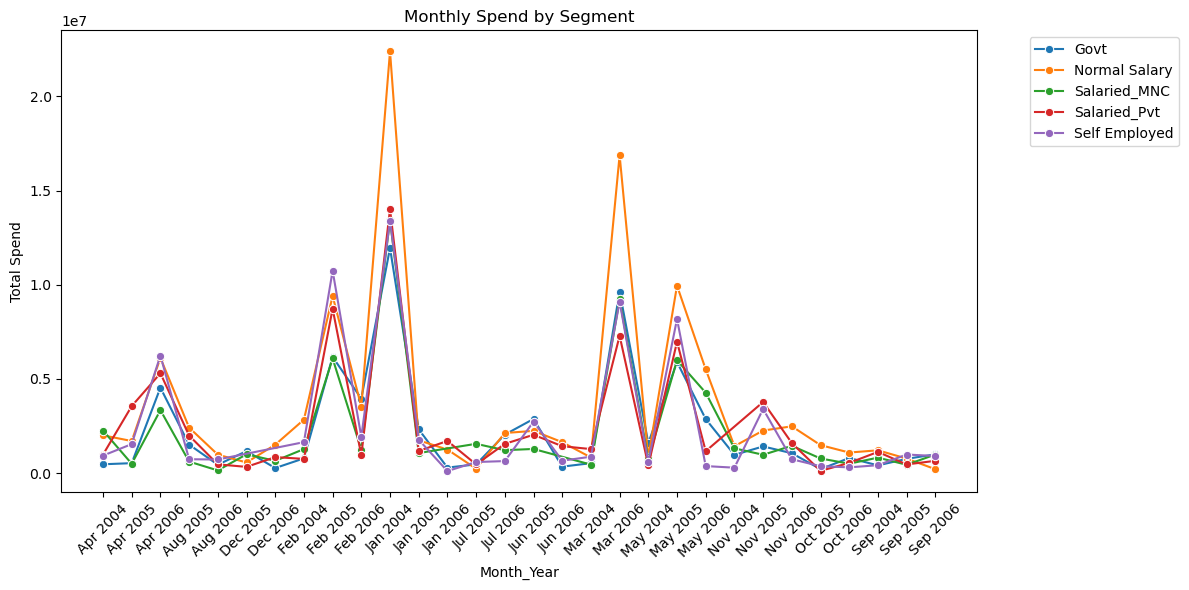

In [20]:
# Visualization for segment spending
plt.figure(figsize=(12, 6))
sns.lineplot(data=segment_spend_monthly, x='Month_Year', y='Amount', hue='Segment', marker='o')
plt.title('Monthly Spend by Segment')
plt.xticks(rotation=45)
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [21]:
# 6. Age group spending analysis
#merged customer aqui and spend table using left outer join
age_spend = df_spend.merge(df_customer[['Customer', 'Age_Group']], left_on='Costomer', right_on='Customer', how='left')
#grouped age_group and month_year
age_spend_monthly = age_spend.groupby(['Age_Group', 'Month_Year'], observed=True)['Amount'].sum().reset_index()
print("\nMonthly Spend by Age Group:")
print(age_spend_monthly)


Monthly Spend by Age Group:
       Age_Group Month_Year     Amount
0    Young Adult   Apr 2004  402113.14
1    Young Adult   Apr 2005 1209736.37
2    Young Adult   Apr 2006 2620867.80
3    Young Adult   Aug 2005  788566.72
4    Young Adult   Aug 2006  166209.05
..           ...        ...        ...
113       Senior   Oct 2005  672040.69
114       Senior   Oct 2006  825854.54
115       Senior   Sep 2004 1150214.47
116       Senior   Sep 2005 1561267.79
117       Senior   Sep 2006 1528156.15

[118 rows x 3 columns]


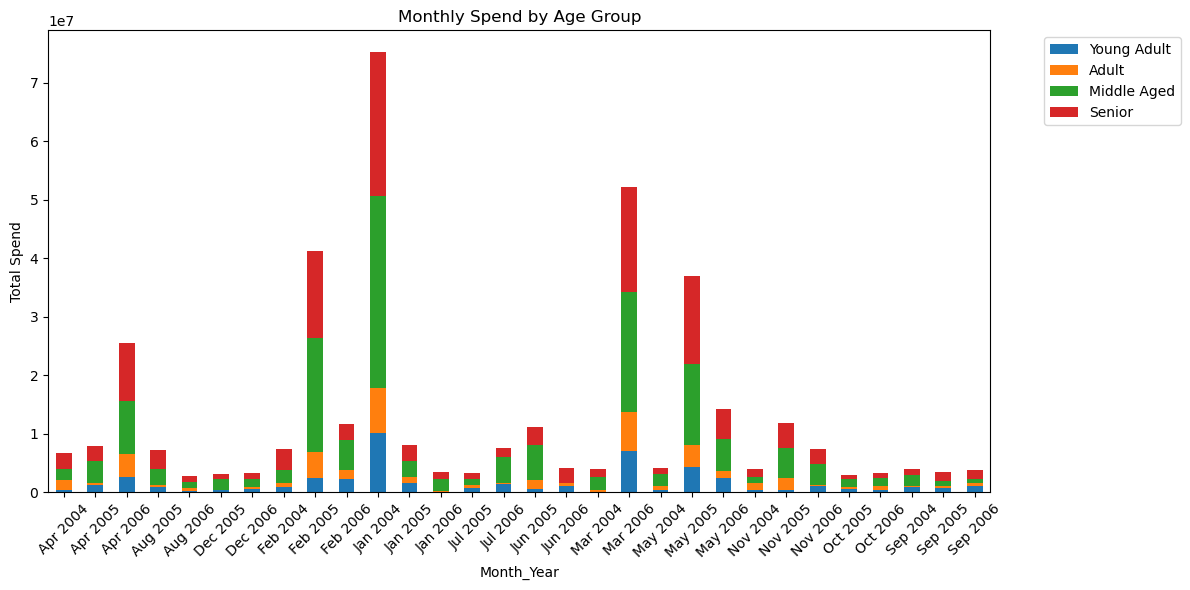

In [22]:
# Visualization: Stacked bar plot
pivot_age_spend = age_spend_monthly.pivot(index='Month_Year', columns='Age_Group', values='Amount').fillna(0)
pivot_age_spend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Monthly Spend by Age Group')
plt.xticks(rotation=45)
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

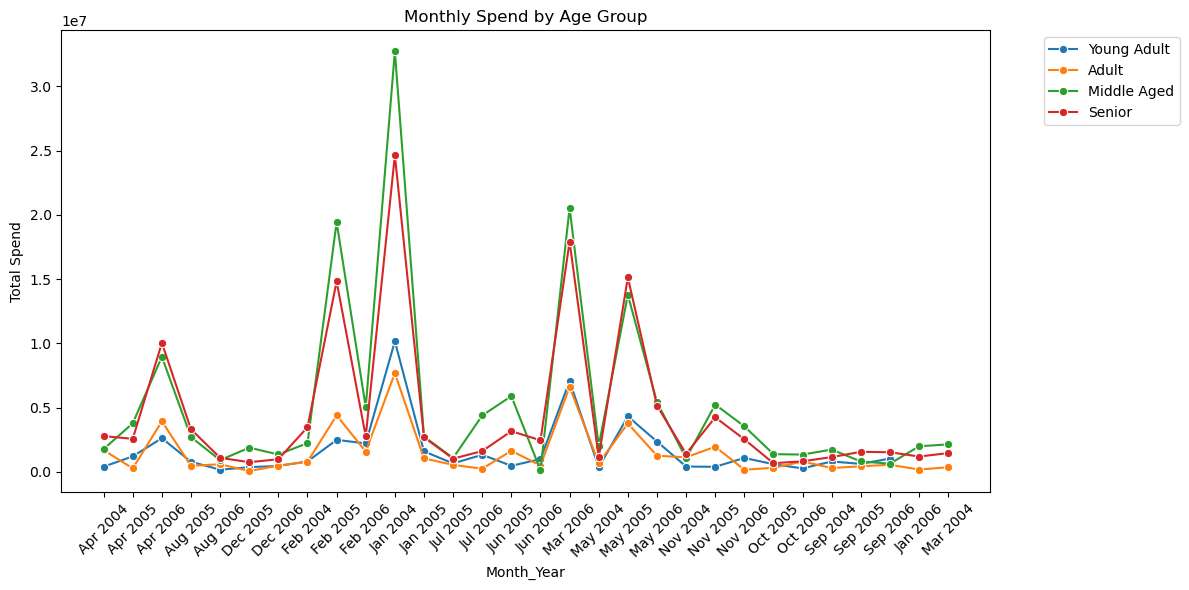

In [23]:
# Visualization for age group spending
# another way of visulizing
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_spend_monthly, x='Month_Year', y='Amount', hue='Age_Group', marker='o')
plt.title('Monthly Spend by Age Group')
plt.xticks(rotation=45)
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [24]:
# 7. Most profitable segment (Profit = Repayment - Spend)
#for profit ---merged monthly_spend and monthly_repayment_summary tables using full outer join
monthly_profit = monthly_spend.merge(monthly_repayment_summary, on=['Costomer', 'Month_Year'], how='outer', suffixes=('_spend', '_repayment')).fillna(0)
monthly_profit['Profit'] = monthly_profit['Amount_spend'] - monthly_profit['Amount_repayment']
#for profit segment wise ---- merged montly_profit and cust aqi tables using left outer join
segment_profit = monthly_profit.merge(df_customer[['Customer', 'Segment']], left_on='Costomer', right_on='Customer', how='left')
#grouped segment monthwise for profit
segment_profit_monthly = segment_profit.groupby(['Segment', 'Month_Year'])['Profit'].sum().reset_index()
print("\nMonthly Profit by Segment:")
print(segment_profit_monthly)


Monthly Profit by Segment:
           Segment Month_Year      Profit
0             Govt   Apr 2004 -1580453.84
1             Govt   Apr 2005   528520.25
2             Govt   Apr 2006 -1482043.91
3             Govt   Aug 2005   573056.38
4             Govt   Aug 2006  -430020.82
..             ...        ...         ...
145  Self Employed   Oct 2005  -210923.88
146  Self Employed   Oct 2006  -534938.10
147  Self Employed   Sep 2004 -1226258.22
148  Self Employed   Sep 2005   827132.83
149  Self Employed   Sep 2006   802282.35

[150 rows x 3 columns]


In [25]:
# 8. Category spending analysis
#grouped type and month_year columns
category_spend = df_spend.groupby(['Type', 'Month_Year'])['Amount'].sum().reset_index()
print("\nMonthly Spend by Category:")
print(category_spend)


Monthly Spend by Category:
             Type Month_Year     Amount
0      AIR TICKET   Apr 2005  469661.35
1      AIR TICKET   Apr 2006 3268222.82
2      AIR TICKET   Aug 2005  800229.45
3      AIR TICKET   Aug 2006  532999.76
4      AIR TICKET   Dec 2005  599550.66
..            ...        ...        ...
250  TRAIN TICKET   Nov 2005 2211154.59
251  TRAIN TICKET   Nov 2006  444281.02
252  TRAIN TICKET   Oct 2006    4442.88
253  TRAIN TICKET   Sep 2004  698851.67
254  TRAIN TICKET   Sep 2006 1108121.03

[255 rows x 3 columns]


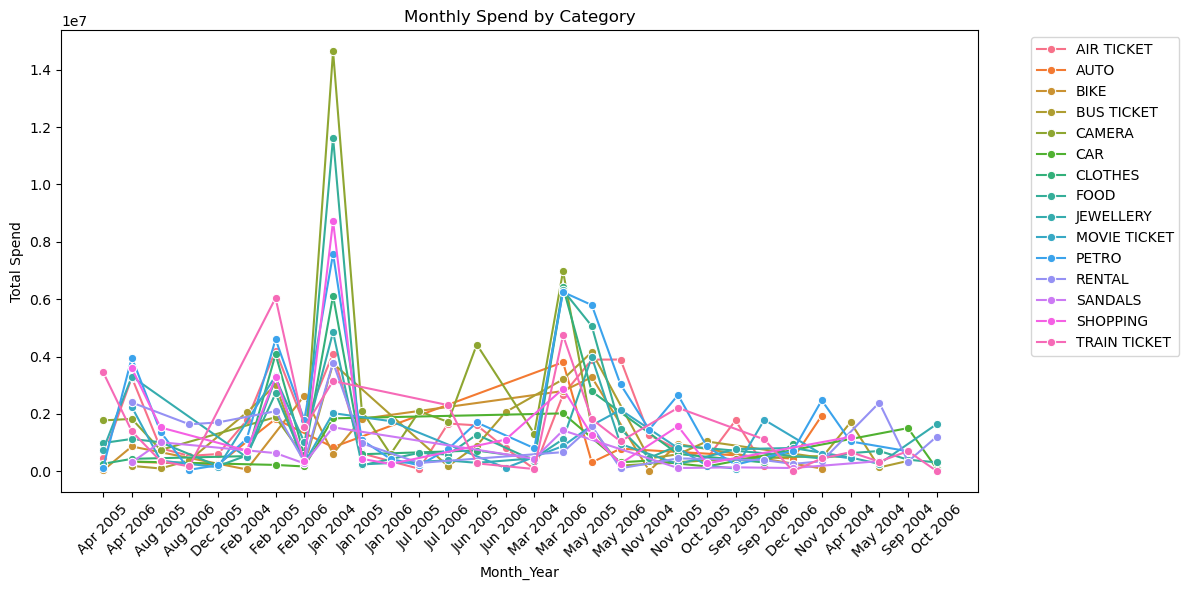

In [26]:
# Visualization for category spending
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_spend, x='Month_Year', y='Amount', hue='Type', marker='o')
plt.title('Monthly Spend by Category')
plt.xticks(rotation=45)
plt.ylabel('Total Spend')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

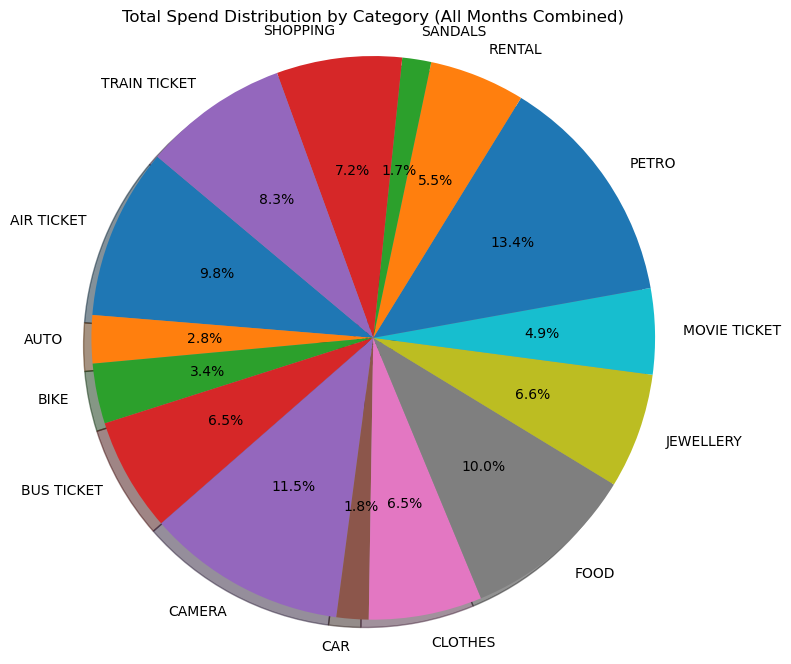

In [27]:
# Aggregate total spend by category
total_spend_by_type = category_spend.groupby('Type')['Amount'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    total_spend_by_type,
    labels=total_spend_by_type.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True
)
plt.title('Total Spend Distribution by Category (All Months Combined)')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

In [28]:
# 9. Impose 2.9% interest rate on due amounts

monthly_balance = monthly_spend.merge(monthly_repayment_summary, on=['Costomer', 'Month_Year'], how='outer', suffixes=('_spend', '_repayment')).fillna(0)
monthly_balance['Due'] = monthly_balance['Amount_spend'] - monthly_balance['Amount_repayment']
monthly_balance['Due'] = monthly_balance['Due'].apply(lambda x: max(x, 0))  # Only positive dues

# Imposed 2.9% interset on dues which gives interest
monthly_balance['Interest'] = monthly_balance['Due'] * 0.029
print("\nMonthly Interest on Due Amounts:")
print(monthly_balance[['Costomer', 'Month_Year', 'Due', 'Interest']])


Monthly Interest on Due Amounts:
     Costomer Month_Year       Due  Interest
0          A1   Apr 2006 193233.58   5603.77
1          A1   Aug 2005 129388.31   3752.26
2          A1   Feb 2004      0.00      0.00
3          A1   Feb 2005 204385.42   5927.18
4          A1   Jan 2004 148397.51   4303.53
...       ...        ...       ...       ...
1097      A95   Jan 2004 272724.39   7909.01
1098      A96   Jan 2004 210224.52   6096.51
1099      A97   Jan 2004      0.00      0.00
1100      A98   Jan 2004      0.00      0.00
1101      A99   Jan 2004 117430.46   3405.48

[1102 rows x 4 columns]


In [29]:
# Amount to be paid by customers to the bank
monthly_balance['Total_Payable'] = monthly_balance['Due'] + monthly_balance['Interest']
print("\nAmount to be paid by customers to the bank")
print(monthly_balance[['Costomer', 'Month_Year', 'Due', 'Interest' , 'Total_Payable']])


Amount to be paid by customers to the bank
     Costomer Month_Year       Due  Interest  Total_Payable
0          A1   Apr 2006 193233.58   5603.77      198837.36
1          A1   Aug 2005 129388.31   3752.26      133140.57
2          A1   Feb 2004      0.00      0.00           0.00
3          A1   Feb 2005 204385.42   5927.18      210312.59
4          A1   Jan 2004 148397.51   4303.53      152701.04
...       ...        ...       ...       ...            ...
1097      A95   Jan 2004 272724.39   7909.01      280633.39
1098      A96   Jan 2004 210224.52   6096.51      216321.03
1099      A97   Jan 2004      0.00      0.00           0.00
1100      A98   Jan 2004      0.00      0.00           0.00
1101      A99   Jan 2004 117430.46   3405.48      120835.95

[1102 rows x 5 columns]


In [30]:
# 10. Monthly profit for the bank = Interest earned
monthly_profit['Bank_Profit'] = monthly_balance['Interest']
bank_profit_monthly = monthly_profit.groupby('Month_Year')['Bank_Profit'].sum().reset_index()
print("\nMonthly Profit for the Bank (Interest Earned):")
print(bank_profit_monthly)


Monthly Profit for the Bank (Interest Earned):
   Month_Year  Bank_Profit
0    Apr 2004    139859.17
1    Apr 2005    142960.57
2    Apr 2006    406504.79
3    Aug 2005    158686.68
4    Aug 2006     64692.97
5    Dec 2005     71185.39
6    Dec 2006     77000.67
7    Feb 2004    179315.89
8    Feb 2005    370686.17
9    Feb 2006    199521.38
10   Jan 2004    577723.31
11   Jan 2005    164964.79
12   Jan 2006     84424.37
13   Jul 2005     59396.42
14   Jul 2006    172635.03
15   Jun 2005    205566.64
16   Jun 2006    104225.14
17   Mar 2004     91546.51
18   Mar 2006    480587.31
19   May 2004     82054.70
20   May 2005    291676.62
21   May 2006    182230.99
22   Nov 2004     95829.68
23   Nov 2005    248955.68
24   Nov 2006    170797.91
25   Oct 2005     67811.87
26   Oct 2006     78690.04
27   Sep 2004     91544.37
28   Sep 2005     74482.09
29   Sep 2006     92836.42


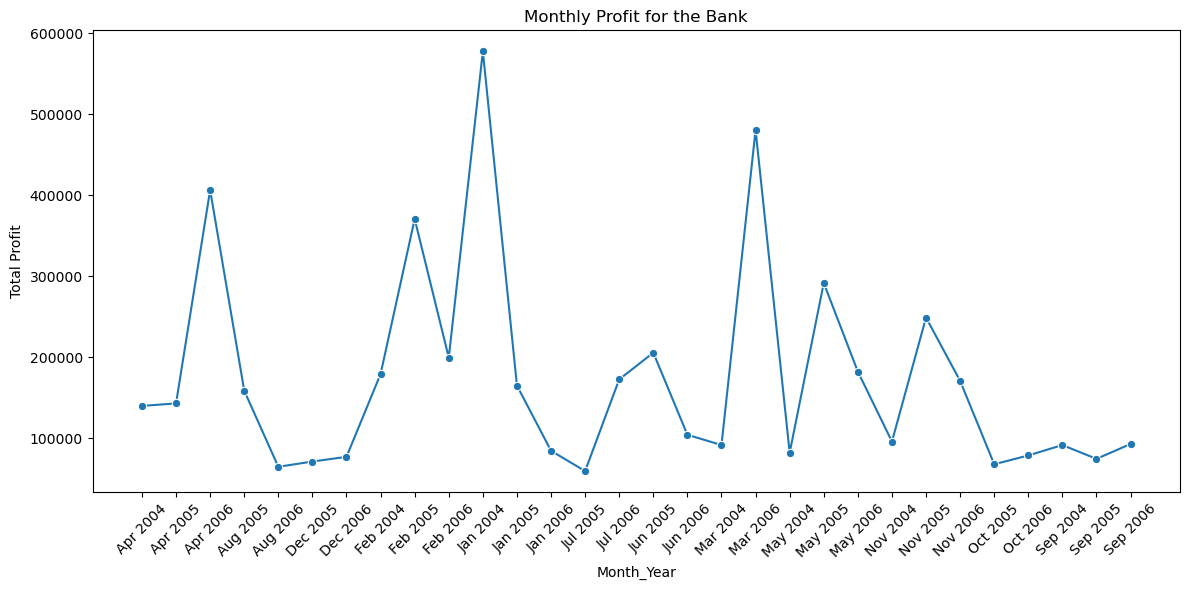

In [31]:
# Visualization for bank profit
plt.figure(figsize=(12, 6))
sns.lineplot(data=bank_profit_monthly, x='Month_Year', y='Bank_Profit', marker='o')
plt.title('Monthly Profit for the Bank')
plt.xticks(rotation=45)
plt.ylabel('Total Profit')
plt.tight_layout()
plt.show()